In [97]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# reading in data

ames_houses = pd.read_csv('./datasets/train.csv')

In [3]:
# looking through data

ames_houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [146]:
# creating a dataframe with only the columns I care about

y = ames_houses['SalePrice']

features = ['MS SubClass',
            'Lot Area',
            'Lot Config',
            'Overall Qual',
            'Overall Cond',
            'Exter Qual',
            'Exter Cond', 
            'Central Air',
            'Gr Liv Area',
            'Full Bath',
            'Functional',
            'Mo Sold',
            'Yr Sold',
           'Fireplaces',
           'Neighborhood',
           'Garage Area']

ames = ames_houses[features].copy()

In [147]:
ames.head()

,MS SubClass,Lot Area,Lot Config,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Central Air,Gr Liv Area,Full Bath,Functional,Mo Sold,Yr Sold,Fireplaces,Neighborhood,Garage Area
0,60,13517,CulDSac,6,8,Gd,TA,Y,1479,2,Typ,3,2010,0,Sawyer,475.0
1,60,11492,CulDSac,7,5,Gd,TA,Y,2122,2,Typ,4,2009,1,SawyerW,559.0
2,20,7922,Inside,5,7,TA,Gd,Y,1057,1,Typ,1,2010,0,NAmes,246.0
3,60,9802,Inside,5,5,TA,TA,Y,1444,2,Typ,4,2010,0,Timber,400.0
4,50,14235,Inside,6,8,TA,TA,Y,1445,2,Typ,3,2010,0,SawyerW,484.0


In [ ]:
# renaming columns:

#college.rename(columns={'Unnamed: 0': 'University'}, inplace = True)

In [117]:
ames.shape

(2051, 16)

In [118]:
ames.dtypes

MS SubClass       int64
Lot Area          int64
Lot Config       object
Overall Qual      int64
Overall Cond      int64
Exter Qual       object
Exter Cond       object
Central Air      object
Gr Liv Area       int64
Full Bath         int64
Functional       object
Mo Sold           int64
Yr Sold           int64
Fireplaces        int64
Neighborhood     object
Garage Area     float64
dtype: object

In [119]:
ames.isnull().sum()

MS SubClass     0
Lot Area        0
Lot Config      0
Overall Qual    0
Overall Cond    0
Exter Qual      0
Exter Cond      0
Central Air     0
Gr Liv Area     0
Full Bath       0
Functional      0
Mo Sold         0
Yr Sold         0
Fireplaces      0
Neighborhood    0
Garage Area     1
dtype: int64

In [140]:
ames['Garage Area'].value_counts()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
         ... 
406.0       1
309.0       1
580.0       1
1184.0      1
557.0       1
Name: Garage Area, Length: 514, dtype: int64

In [144]:
ames_null = ames['Garage Area'].isnull()

ames[ames_null]

,MS SubClass,Lot Area,Lot Config,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Central Air,Gr Liv Area,Full Bath,Functional,Mo Sold,Yr Sold,Fireplaces,Neighborhood,Garage Area
1712,70,9060,Inside,5,6,TA,TA,Y,1828,2,Typ,3,2007,0,IDOTRR,NaN


In [148]:
ames['Garage Area'] = ames['Garage Area'].fillna(0)

In [149]:
ames.describe()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Gr Liv Area,Full Bath,Mo Sold,Yr Sold,Fireplaces,Garage Area
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,10065.208191,6.112140,5.562165,1499.330083,1.577279,6.219893,2007.775719,0.590931,473.440761
std,42.824223,6742.488909,1.426271,1.104497,500.447829,0.549279,2.744736,1.312014,0.638516,216.135102
min,20.000000,1300.000000,1.000000,1.000000,334.000000,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,20.000000,7500.000000,5.000000,5.000000,1129.000000,1.000000,4.000000,2007.000000,0.000000,319.000000
50%,50.000000,9430.000000,6.000000,5.000000,1444.000000,2.000000,6.000000,2008.000000,1.000000,480.000000
75%,70.000000,11513.500000,7.000000,6.000000,1728.500000,2.000000,8.000000,2009.000000,1.000000,576.000000
max,190.000000,159000.000000,10.000000,9.000000,5642.000000,4.000000,12.000000,2010.000000,4.000000,1418.000000


In [150]:
ames.isnull().sum()

MS SubClass     0
Lot Area        0
Lot Config      0
Overall Qual    0
Overall Cond    0
Exter Qual      0
Exter Cond      0
Central Air     0
Gr Liv Area     0
Full Bath       0
Functional      0
Mo Sold         0
Yr Sold         0
Fireplaces      0
Neighborhood    0
Garage Area     0
dtype: int64

In [121]:
ames['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [129]:
ames['Overall Cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

(array([115., 237., 404., 696., 336., 153.,  87.,  11.,   8.,   4.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <a list of 10 Patch objects>)

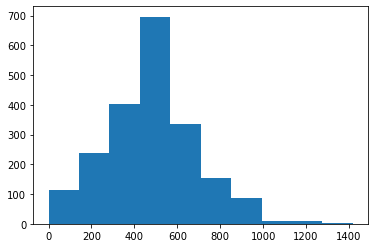

In [151]:
plt.hist(ames['Garage Area'])

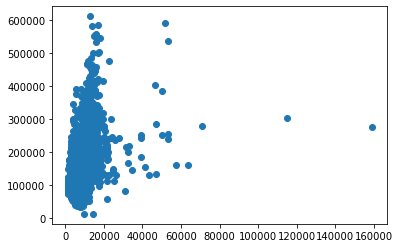

In [123]:
plt.scatter(ames['Lot Area'], y)

<BarContainer object of 2051 artists>

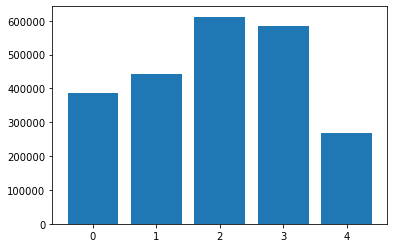

In [124]:
plt.bar(ames['Full Bath'], y)

<BarContainer object of 2051 artists>

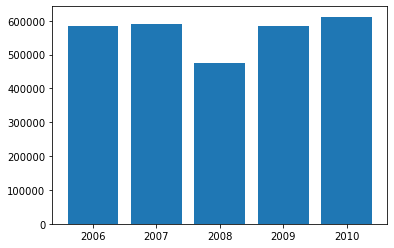

In [125]:
plt.bar(ames['Yr Sold'], y)

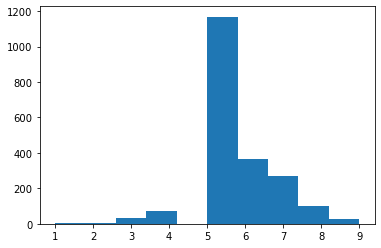

In [126]:
plt.hist(ames['Overall Cond']);

<BarContainer object of 2051 artists>

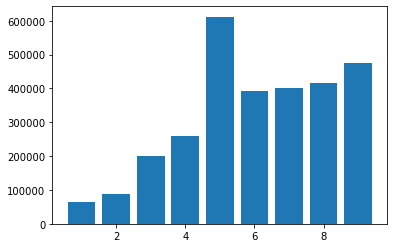

In [127]:
plt.bar(ames['Overall Cond'], y)

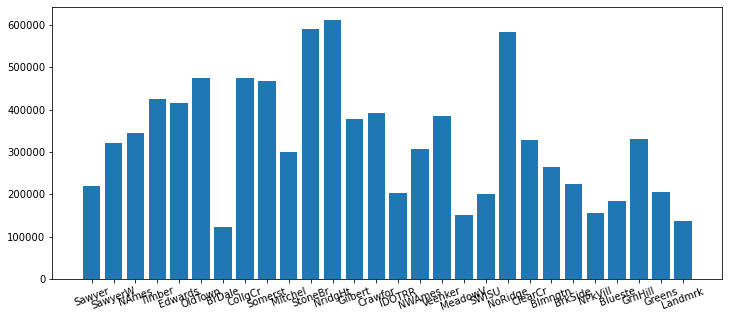

In [168]:
plt.figure(figsize = (12, 5))

plt.bar(ames['Neighborhood'], y)

plt.xticks(rotation = 20);

In [152]:
# Numerical X - making a baseline X from only the numerical columns that I've chosen

X = ames._get_numeric_data()

In [158]:
# Creating the model: splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 142)

In [159]:
# making a model and fitting the model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [160]:
# getting cross value score for model

cross_val_score(lr, X_train, y_train).mean()

# not terrible, but could certainly be better. Moving forward with the baseline model.

0.7576543143008623

In [161]:
# getting r2 score for training data

lr.score(X_train, y_train)

0.7658516466597094

In [162]:
# getting r2 score for testing data

lr.score(X_test, y_test)

0.8139959568099141

In [163]:
# Getting y prediction values

y_preds = lr.predict(X)

In [165]:
# Calculating RMSE

RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))

RMSE

37376.31193017699